In [1]:
# Importing and setting up
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # additional plotting tools
from sosp import simple

In [2]:
# Self-paced reading: just fill in links
centers = np.array([[1, 0], [0, 1.]]) # N1-V, N2-V
cond_names = ['canoe_cabin_is', 'canoe_cabins_is', 'canoe_cabin_are', 'canoe_cabins_are',
              'canoe_kayak_is', 'canoe_kayaks_is', 'canoe_kayak_are', 'canoe_kayaks_are']
ml = 0.8
fm = 0.24  # need to have some h_i...
cond_harmonies = np.array([[1, ml*(1-fm*3)],
                           [1, ml*(1-fm*4)],
                           [(1-fm), ml*(1-fm*4)],
                           [(1-fm), ml*(1-fm*3)],
                           [1, ml],
                           [1, ml*(1-fm)],
                           [(1-fm), ml*(1-fm)],
                           [(1-fm), ml]])
gamma = 0.4
#cond_names = cond_names[:2] + cond_names[4:6]
#cond_harmonies = np.row_stack([cond_harmonies[:2], cond_harmonies[4:6]])

In [3]:
cond_harmonies

array([[1.   , 0.224],
       [1.   , 0.032],
       [0.76 , 0.032],
       [0.76 , 0.224],
       [1.   , 0.8  ],
       [1.   , 0.608],
       [0.76 , 0.608],
       [0.76 , 0.8  ]])

In [4]:
xinit = np.zeros(centers.shape[1])
sys = simple.SimpleModel(corpus_filename=None, centers=centers, local_harmonies=cond_harmonies[0,],
                         stopping_crit='cheb_stop')
sys.set_gamma(gamma)
sys.set_noise_mag(0.001)
sys.set_tol(0.1)

In [5]:
for i in range(cond_harmonies.shape[0]):
    sys.set_local_harmonies(cond_harmonies[i,])
    sys.locate_attrs()
    print(sys.attrs)

Found 1 unique attractors from 2 centers
[[1. 0.]]
Found 1 unique attractors from 2 centers
[[1. 0.]]
Found 1 unique attractors from 2 centers
[[1. 0.]]
Found 1 unique attractors from 2 centers
[[1. 0.]]
Found 2 unique attractors from 2 centers
[[0.01 0.99]
 [0.99 0.01]]
Found 1 unique attractors from 2 centers
[[1. 0.]]
Found 2 unique attractors from 2 centers
[[0.01 0.99]
 [0.99 0.01]]
Found 2 unique attractors from 2 centers
[[0.01 0.99]
 [0.99 0.01]]


In [6]:
data = sys.run_multiple_conditions(n_runs=2000, conditions=cond_harmonies)
# Error in line 130 of simple.py: 'Length of values does not match length of index'; seems to be noise-related

Found 1 unique attractors from 2 centers
Condition 0
Run number:
[0] [100] [200] [300] [400] [500] [600] [700] [800] [900] [1000] [1100] [1200] [1300] [1400] [1500] [1600] [1700] [1800] [1900] Found 1 unique attractors from 2 centers
Condition 1
Run number:
[0] [100] [200] [300] [400] [500] [600] [700] [800] [900] [1000] [1100] [1200] [1300] [1400] [1500] [1600] [1700] [1800] [1900] Found 1 unique attractors from 2 centers
Condition 2
Run number:
[0] [100] [200] [300] [400] [500] [600] [700] [800] [900] [1000] [1100] [1200] [1300] [1400] [1500] [1600] [1700] [1800] [1900] Found 1 unique attractors from 2 centers
Condition 3
Run number:
[0] [100] [200] [300] [400] [500] [600] [700] [800] [900] [1000] [1100] [1200] [1300] [1400] [1500] [1600] [1700] [1800] [1900] Found 2 unique attractors from 2 centers
Condition 4
Run number:
[0] [100] [200] [300] [400] [500] [600] [700] [800] [900] [1000] [1100] [1200] [1300] [1400] [1500] [1600] [1700] [1800] [1900] Found 1 unique attractors from 2 ce

In [7]:
cond_dict = {i: n for i, n in zip(range(len(cond_names)), cond_names)}
data['Condition'] = data.Condition.map(cond_dict)
print(data.groupby(['Condition', 'CenterNr']).agg(['mean', 'std', 'count']))
print(data.groupby(['Condition']).Time.agg(['mean', 'std']))

                                 Time                 
                                 mean        std count
Condition        CenterNr                             
canoe_cabin_are  0         135.566500   9.540288  2000
canoe_cabin_is   0         104.968000   6.814117  2000
canoe_cabins_are 0         139.598500  10.170350  2000
canoe_cabins_is  0         102.911000   6.358875  2000
canoe_kayak_are  0         162.651055  24.654120  1943
                 1         240.947368  42.396690    57
canoe_kayak_is   0         123.672081  16.118785  1970
                 1         187.100000  41.745824    30
canoe_kayaks_are 0         189.888889  37.886701   621
                 1         172.614213  32.125624  1379
canoe_kayaks_is  0         113.072000   8.197891  2000
                      mean        std
Condition                            
canoe_cabin_are   135.5665   9.540288
canoe_cabin_is    104.9680   6.814117
canoe_cabins_are  139.5985  10.170350
canoe_cabins_is   102.9110   6.358875
ca

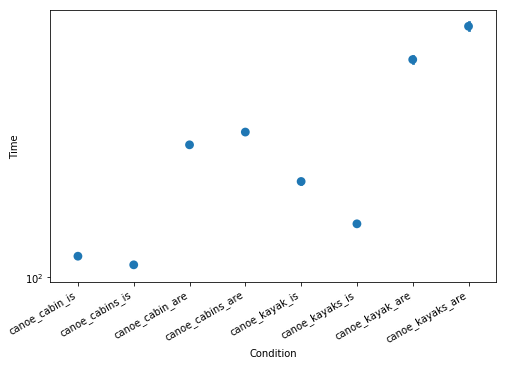

In [8]:
plt.subplots(figsize=(8, 5))
fig = sns.pointplot(x='Condition', y='Time', data=data, ci=95, linestyles='')
fig.set_xticklabels(fig.get_xticklabels(), rotation=30, ha='right')
fig.set_yscale('log')
plt.show()

In [9]:
def split_n2(row):
    if 'cabin' in row['Condition']:
        return 'dissim'
    elif 'kayak' in row['Condition']:
        return 'sim'


def split_num(row):
    if 'cabins' in row['Condition'] or 'kayaks' in row['Condition']:
        return 'N2pl'
    else:
        return 'N2sg'


def split_vnum(row):
    if 'is' in row['Condition']:
        return 'Vsg'
    elif 'are' in row['Condition']:
        return 'Vpl'

In [10]:
data['SemSim'] = data.apply(lambda row: split_n2(row), axis=1)
data['N2Num'] = data.apply(lambda row: split_num(row), axis=1)
data['VNum'] = data.apply(lambda row: split_vnum(row), axis=1)

In [16]:
print(data.groupby(['SemSim', 'N2Num', 'VNum', 'CenterNr']).Condition.agg('count'))
print(data.groupby(['SemSim', 'N2Num', 'VNum', 'CenterNr']).Condition.agg('count') / 2000.)

SemSim  N2Num  VNum  CenterNr
dissim  N2pl   Vpl   0           2000
               Vsg   0           2000
        N2sg   Vpl   0           2000
               Vsg   0           2000
sim     N2pl   Vpl   0            621
                     1           1379
               Vsg   0           2000
        N2sg   Vpl   0           1943
                     1             57
               Vsg   0           1970
                     1             30
Name: Condition, dtype: int64
SemSim  N2Num  VNum  CenterNr
dissim  N2pl   Vpl   0           1.0000
               Vsg   0           1.0000
        N2sg   Vpl   0           1.0000
               Vsg   0           1.0000
sim     N2pl   Vpl   0           0.3105
                     1           0.6895
               Vsg   0           1.0000
        N2sg   Vpl   0           0.9715
                     1           0.0285
               Vsg   0           0.9850
                     1           0.0150
Name: Condition, dtype: float64


<Figure size 432x288 with 0 Axes>

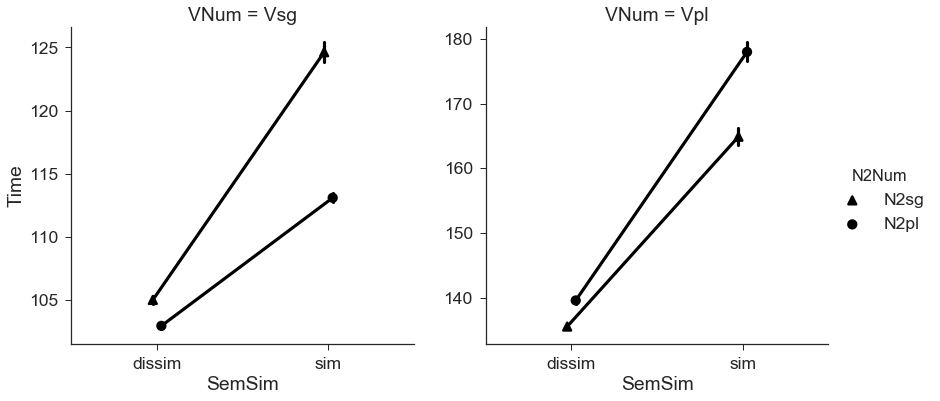

In [14]:
sns.set(font_scale=1.75)
sns.set_style('ticks')
sns.despine()
g = sns.factorplot(x="SemSim", y="Time", hue="N2Num", col="VNum", data=data, kind="point", dodge=True,
                   size=6, sharey=False, markers=['^', 'o'], palette={'N2sg': 'k', 'N2pl': 'k'})

In [15]:
g.savefig('EIsimpleResults.pdf')

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

lm=ols('Time ~ 1 + C(SemSim, Sum) * C(N2Num, Sum) * C(VNum, Sum)', data=data).fit()
#print(sm.stats.anova_lm(lm, typ=3))
print(lm.summary())

In [ ]:
lm2 = ols('Time ~ 1 + C(SemSim, Sum) * C(N2Num, Sum)', data=data[data['VNum'] == 'Vsg']).fit()
print(lm2.summary())
#print(sm.stats.anova_lm(lm2, typ=3))